<a href="https://colab.research.google.com/github/JinseokCodeDiary/first-repository/blob/master/Exploration_quest/quest06/quest06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.7 MB/s eta 0:00:00


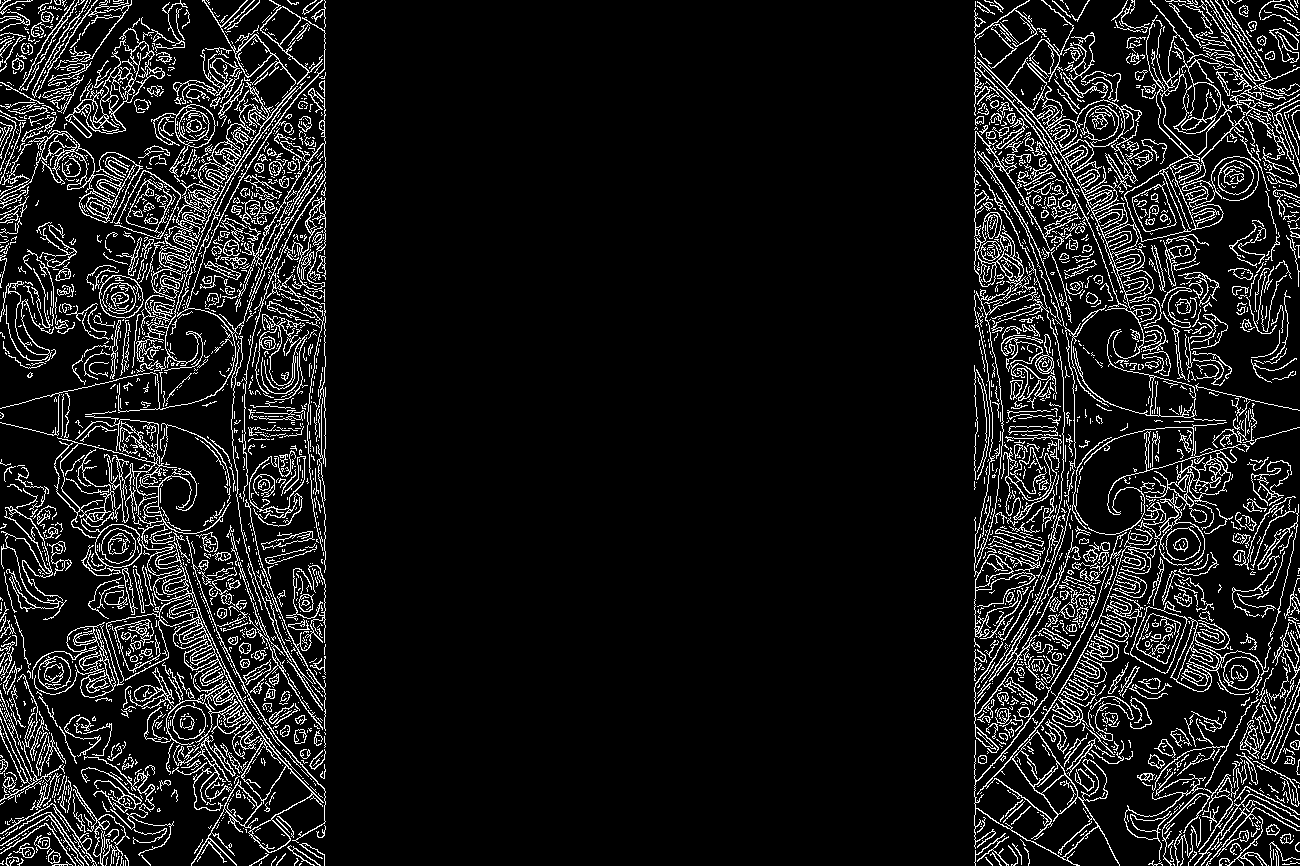

In [34]:
from diffusers.utils import load_image
from PIL import Image
import cv2
import numpy as np
from diffusers.utils import load_image

canny_image = load_image("/content/cannyimage.jpg")
canny_image = np.array(canny_image)

#threshhold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 이미지를 NumPy 배열로 변환합니다.
canny_image = np.array(canny_image)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다.
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다.
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)


canny_image

In [4]:
pip install controlnet_aux

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 16.3 MB/s eta 0:00:00


In [26]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

# Q. 아래의 코드를 작성해 주세요.
# 이미지를 불러옵니다.
openpose_image = load_image("/content/openpose.jpg")

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)

/usr/local/lib/python3.10/dist-packages/controlnet_aux/open_pose/body.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = util.transfer(self.model, torch.load(

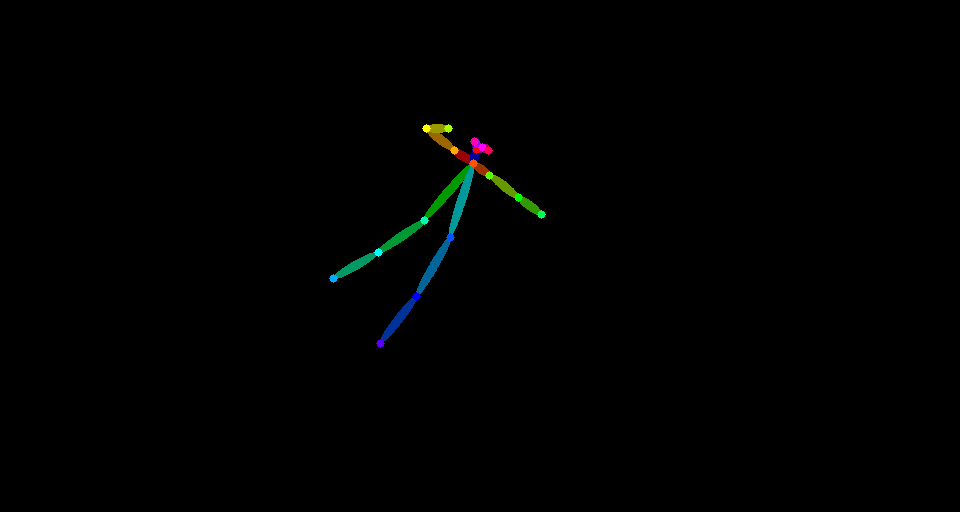

In [27]:
openpose_image1 = openpose_image
openpose_image1

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="transformers.tokenization_utils_base")
# Q. 코드를 작성해 보세요.
# Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다.
controlnet_canny = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny")
controlnet_openpose = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose")
controlnets = [controlnet_canny, controlnet_openpose]

# 리스트 controlnets를 파이프라인으로 전달합니다.
pipe =  StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets,
    torch_dtype=torch.float32
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# pipe = pipe.to("cuda")
openpose_image = openpose_image.resize(canny_image.size)
# 프롬프트를 작성합니다.
prompt =  "freak punch and jump toward hell gate, this is old and huge, "
negative_prompt =  "happy"

# seed를 지정합니다.
generator = torch.manual_seed(0)

images = [openpose_image, canny_image]

# 이미지를 생성합니다.
image = pipe(
    prompt=prompt,
    negative_propmt = negative_prompt,
    num_inference_steps=30,
    guidance_scale = 10,
    generator=generator,
    image=images
).images[0]

# 생성된 이미지를 저장합니다.
image.save("/content/Untitled Folder/multi_controlnet_output.png")

# 생성된 이미지를 출력합니다.
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

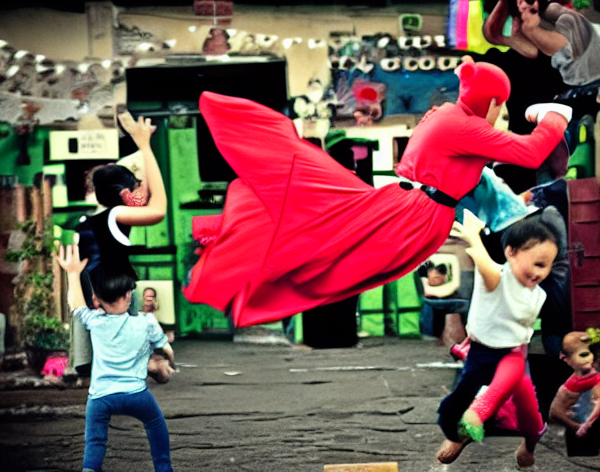

In [31]:
image

# prompt =  "happy bady punch and jump"
# negative_prompt =  "negative"

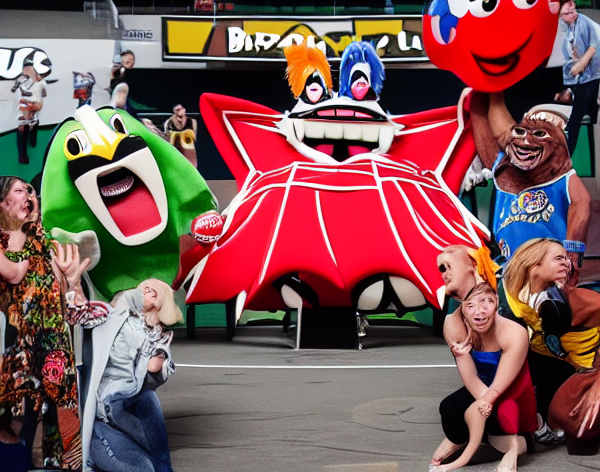

In [29]:
image
# prompt =  " mascot, bady, funny face, a biting look on one's face, punch, jump"
# negative_prompt =  "fear, negative, angry"

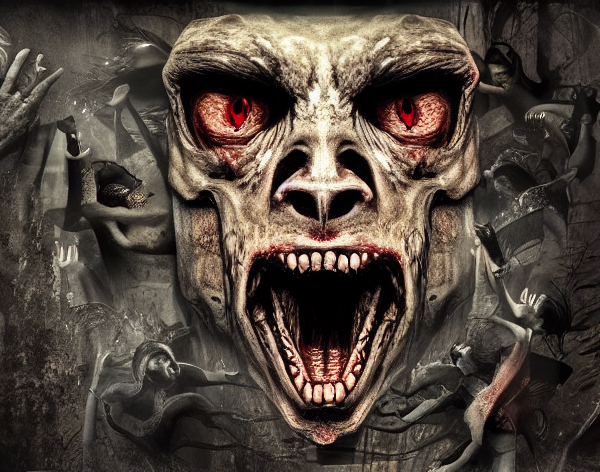

In [20]:
image
## prompt : monster, negative prompt : mercy

# 다른 모델 시도

In [3]:
pip install transformers

In [5]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
  Using cached tokenizers-0.19.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 42.5 MB/s eta 0:00:00
Using cached tokenizers-0.19.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.25.1
    Uninstalling transformers-4.25.1:
      Successfully uninstalled transformers-4.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dalle-mini 0.1.5 requires jax==0.3.25, but you have jax 0.4.31 which is incompatible.
dalle-mini 0.1.5 requir

In [1]:
from transformers import DalleBartProcessor, DalleBartForConditionalGeneration
import torch
from PIL import Image

# 모델과 프로세서 로드
model = DalleBartForConditionalGeneration.from_pretrained("flax-community/dalle-mini")
processor = DalleBartProcessor.from_pretrained("flax-community/dalle-mini")

prompt = "a beautiful landscape with mountains and rivers"
inputs = processor([prompt], return_tensors="pt")

# GPU가 있다면 CUDA로 모델을 옮길 수 있습니다.
if torch.cuda.is_available():
    model = model.to("cuda")
    inputs = {k: v.to("cuda") for k, v in inputs.items()}

# 이미지 생성
outputs = model.generate(**inputs)
generated_images = processor.batch_decode(outputs, skip_special_tokens=True)[0]

# 결과 출력
print(generated_images)


ImportError: cannot import name 'DalleBartProcessor' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

In [2]:
pip install diffusers transformers torch

In [6]:
pip install --upgrade jax jaxlib

In [7]:
from diffusers import StableDiffusionPipeline
import torch

# Stable Diffusion 모델 로드
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

if torch.cuda.is_available():
    model = model.to("cuda")
    inputs = {k: v.to("cuda") for k, v in inputs.items()}
# 텍스트 프롬프트로 이미지 생성
prompt = "a beautiful landscape with mountains and rivers"
image = pipe(prompt).images[0]

# 생성된 이미지 저장
image.save("output.png")


RuntimeError: Failed to import diffusers.pipelines.stable_diffusion because of the following error (look up to see its traceback):
cannot import name 'linear_util' from 'jax' (/usr/local/lib/python3.10/dist-packages/jax/__init__.py)

In [4]:
import requests
from PIL import Image
from io import BytesIO
import base64

def generate_image(prompt):
    url = "https://api.craiyon.com/draw"
    response = requests.post(url, json={"prompt": prompt})
    images = response.json().get("images", [])
    return images

prompt = "a beautiful landscape with mountains and rivers"
images = generate_image(prompt)

# 첫 번째 이미지를 디코딩하여 저장
image_data = base64.b64decode(images[0])
image = Image.open(BytesIO(image_data))
image.save("output.png")


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
from diffusers import DiffusionPipeline
import torch


RuntimeError: Failed to import diffusers.pipelines.pipeline_utils because of the following error (look up to see its traceback):
Failed to import diffusers.models.autoencoders.autoencoder_kl because of the following error (look up to see its traceback):
cannot import name 'linear_util' from 'jax' (/usr/local/lib/python3.10/dist-packages/jax/__init__.py)

In [9]:
pip install diffusers transformers torch

In [14]:
python 3.10 -m venv myenv
.\myenv\Scripts\activate
pip install diffusers transformers torch

SyntaxError: invalid syntax (<ipython-input-14-c6d05b8e80f7>, line 1)

In [10]:
from diffusers import StableDiffusionPipeline
import torch

# Stable Diffusion 모델 로드
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)


# 텍스트 프롬프트로 이미지 생성
prompt = "a beautiful landscape with mountains and rivers"
image = pipe(prompt).images[0]

# 생성된 이미지 저장
image.save("output.png")


RuntimeError: Failed to import diffusers.pipelines.stable_diffusion because of the following error (look up to see its traceback):
cannot import name 'linear_util' from 'jax' (/usr/local/lib/python3.10/dist-packages/jax/__init__.py)

In [15]:
pip install torch torchvision

In [17]:
pip install transformers torch torchvision

In [19]:
pip install pytorch-pretrained-biggan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.9 MB/s eta 0:00:00


In [6]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_int, truncated_noise_sample
from PIL import Image
from torchvision.transforms import ToPILImage

# BigGAN 모델 로드
model = BigGAN.from_pretrained('biggan-deep-512')
model.eval()

# 클래스 ID 설정 (예: 207은 골든 리트리버)
class_vector = one_hot_from_int([207], batch_size=1)

# Noise 생성
noise_vector = truncated_noise_sample(truncation=0.4, batch_size=1)

# 텐서로 변환
class_vector = torch.from_numpy(class_vector)
noise_vector = torch.from_numpy(noise_vector)

# 모델 사용하여 이미지 생성
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation=0.4)

# 이미지 변환 및 저장
image = ToPILImage()(output.squeeze(0))
image.save("biggan_output.png")
image.show()


100%|██████████| 800/800 [00:00<00:00, 367760.11B/s]
/usr/local/lib/python3.10/dist-packages/pytorch_pretrained_biggan/model.py:279: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featu

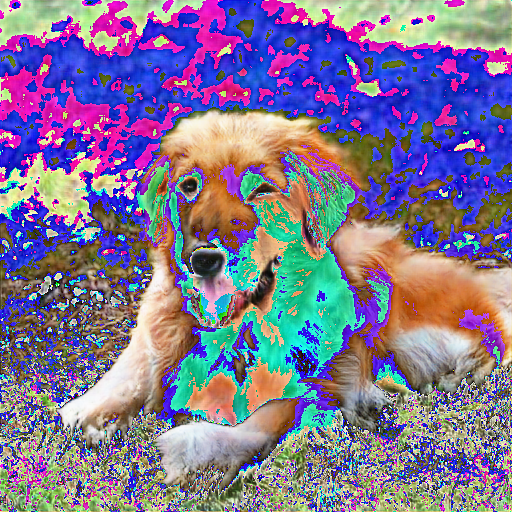

In [7]:
image

In [22]:
pip install diffusers transformers torch

In [24]:
pip uninstall jax jaxlib

Found existing installation: jax 0.4.31
Uninstalling jax-0.4.31:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/jax-0.4.31.dist-info/*
    /usr/local/lib/python3.10/dist-packages/jax/*
Proceed (Y/n)? y
  Successfully uninstalled jax-0.4.31
Found existing installation: jaxlib 0.4.31
Uninstalling jaxlib-0.4.31:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/jaxlib-0.4.31.dist-info/*
    /usr/local/lib/python3.10/dist-packages/jaxlib/*
Proceed (Y/n)? y
  Successfully uninstalled jaxlib-0.4.31


In [1]:
pip install jax jaxlib

In [3]:
from diffusers import StableDiffusionPipeline
import torch

# Stable Diffusion 모델 로드
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# 프롬프트 설정
prompt = "a beautiful landscape with mountains and rivers"
image = pipe(prompt).images[0]

# 이미지 저장
image.save("output.png")


RuntimeError: Failed to import diffusers.pipelines.stable_diffusion because of the following error (look up to see its traceback):
cannot import name 'linear_util' from 'jax' (/usr/local/lib/python3.10/dist-packages/jax/__init__.py)